<a href="https://colab.research.google.com/github/araldi/HS22_Big-Data-analysis-in-Biomedical-Research/blob/main/Week_07/12_Clustering_K_means_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl

## Food nutrient content

In [ ]:
food = pd.read_csv('https://think.cs.vt.edu/corgis/datasets/csv/food/food.csv')
food_ML = food.drop(columns = ['Category', 'Description', 'Nutrient Data Bank Number'])


In [ ]:
mcg = ['Data.Alpha Carotene',
'Data.Beta Carotene',
'Data.Beta Cryptoxanthin',
'Data.Lutein and Zeaxanthin',
'Data.Lycopene',
'Data.Retinol',
'Data.Selenium',
'Data.Vitamins.Vitamin A - RAE',
'Data.Vitamins.Vitamin B12',
'Data.Vitamins.Vitamin K']



mg = ['Data.Cholesterol',
'Data.Choline',
'Data.Niacin',
'Data.Riboflavin',
'Data.Thiamin',
'Data.Major Minerals.Calcium',
'Data.Major Minerals.Copper',
'Data.Major Minerals.Iron',
'Data.Major Minerals.Magnesium',
'Data.Major Minerals.Phosphorus',
'Data.Major Minerals.Potassium',
'Data.Major Minerals.Sodium',
'Data.Major Minerals.Zinc',
'Data.Vitamins.Vitamin B6',
'Data.Vitamins.Vitamin C',
'Data.Vitamins.Vitamin E']

food_ML[mg] = food_ML[mg] / 1000
food_ML[mcg] = food_ML[mcg] / 1000000

### Cluster

In [ ]:
Nclust = 3
from sklearn import cluster
foodclustersKM = cluster.KMeans(n_clusters=Nclust).fit(food_ML)


In [ ]:
food['Cluster'] = foodclustersKM.labels_

### Verify the clusters

In [ ]:
food[['Data.Protein', 'Data.Carbohydrate', 'Data.Fat.Total Lipid', 'Data.Fiber', 'Data.Water', 'Cluster']]

,Data.Protein,Data.Carbohydrate,Data.Fat.Total Lipid,Data.Fiber,Data.Water,Cluster
0,1.03,6.89,4.38,0.0,87.50,1
1,3.34,4.87,1.99,0.0,89.04,1
2,3.28,4.67,3.20,0.0,88.10,1
3,3.10,4.46,3.46,0.0,88.20,1
4,3.28,4.67,3.20,0.0,88.10,1
...,...,...,...,...,...,...
7078,1.11,5.48,0.23,1.6,92.57,0
7079,3.46,4.81,0.38,1.4,90.37,1
7080,1.81,11.60,0.19,2.2,85.59,1
7081,1.34,17.14,22.85,0.6,55.97,0


In [ ]:
food['Cluster'].value_counts()

1    6626
0     273
2     184
Name: Cluster, dtype: int64

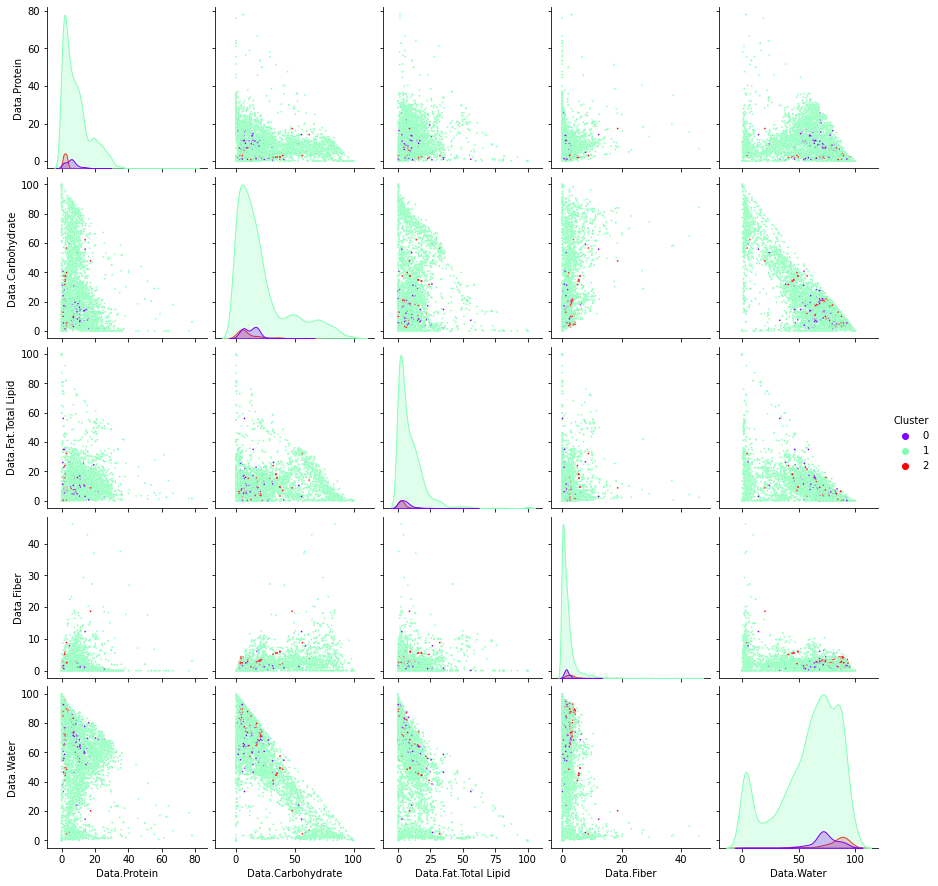

In [ ]:
data = food[['Data.Protein', 'Data.Carbohydrate', 'Data.Fat.Total Lipid', 'Data.Fiber', 'Data.Water','Cluster']]
sns.pairplot(data, hue='Cluster', palette="rainbow", plot_kws={"s": 3})

### Exercise

Choose the most representative scatterplot/histplot to show how the three clusters differ (with new scatterplots/histplot).

Any guesses on which are the food categories?

In [ ]:
food.head()

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,...,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K,Cluster
0,Milk,"Milk, human",11000000,0,7,0,6.89,14,16.0,0.0,...,51,17,0.17,61,0.05,0.011,5.0,0.08,0.3,1
1,Milk,"Milk, NFS",11100000,0,4,0,4.87,8,17.9,0.0,...,157,39,0.42,59,0.56,0.060,0.1,0.03,0.2,1
2,Milk,"Milk, whole",11111000,0,7,0,4.67,12,17.8,0.0,...,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3,1
3,Milk,"Milk, low sodium, whole",11111100,0,7,0,4.46,14,16.0,0.0,...,253,3,0.38,29,0.36,0.034,0.9,0.08,0.3,1
4,Milk,"Milk, calcium fortified, whole",11111150,0,7,0,4.67,12,17.8,0.0,...,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3,1


In [ ]:
# cluster 0 contains 
food[food['Cluster'] == 0 ]['Category'].value_counts().head(20)

Pasta                                        24
Pasta with tomato-based sauce                16
Ravioli                                       8
Beef                                          6
Tomatoes                                      6
Chicken or turkey                             6
Tomato soup                                   5
Pork                                          4
Lasagna with meat                             4
Stuffed shells                                4
Pasta with tomato-based sauce and seafood     3
Pasta with tomato-based sauce and meat        3
Tortellini                                    3
Manicotti                                     3
Pasta with tomato-based sauce and poultry     3
Lasagna                                       3
Spaghetti sauce                               3
Salsa                                         3
Chili con carne with beans                    3
Ketchup                                       2
Name: Category, dtype: int64

In [ ]:
food[food['Cluster'] == 1 ]['Category'].value_counts().head(20)

Infant formula                     173
Rice                               143
Bread                              119
Potato                             105
Cookie                             100
Frankfurter or hot dog sandwich     95
Coffee                              91
Egg omelet or scrambled egg         82
Pie                                 77
Beef                                71
Cheese                              60
Chocolate milk                      51
Crackers                            51
Oatmeal                             44
Chicken                             44
Turkey                              43
Tea                                 41
Egg                                 41
Pretzels                            40
Pizza                               38
Name: Category, dtype: int64

In [ ]:
food[food['Cluster'] == 2 ]['Category'].value_counts().head(20)

Carrots               27
Sweet potato          26
Spinach               18
Collards              14
Mustard greens         8
Turnip greens          8
Sweet potato fries     8
Kale                   8
Greens                 7
Sweet potato tots      6
Peas and carrots       5
Lettuce                3
Beet greens            2
Dandelion greens       2
Cress                  2
Pumpkin                2
Chard                  2
Watercress             2
Mixed vegetables       1
Calabaza               1
Name: Category, dtype: int64

What happens if you scale the data before clustering?

In [ ]:
food_ML_scaled = skl.preprocessing.scale(food_ML, axis=0)  ### WHAT HAPPENS IF WE STANDARDIZE?

In [ ]:
foodclustersKM_scaled = cluster.KMeans(n_clusters=Nclust).fit(food_ML_scaled)
food['Cluster_scaled'] = foodclustersKM_scaled.labels_

In [ ]:
food['Cluster_scaled'].value_counts()

0    3778
1    3118
2     187
Name: Cluster_scaled, dtype: int64

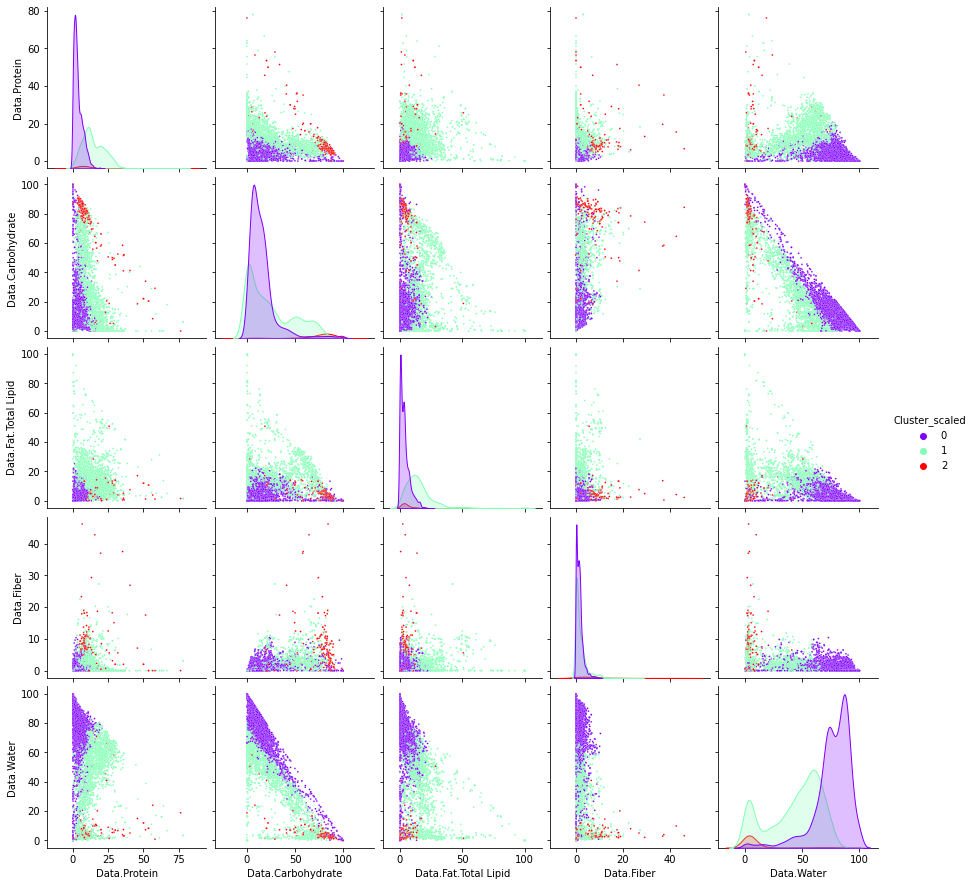

In [ ]:
data = food[['Data.Protein', 'Data.Carbohydrate', 'Data.Fat.Total Lipid', 'Data.Fiber', 'Data.Water','Cluster_scaled']]
sns.pairplot(data, hue='Cluster_scaled', palette="rainbow", plot_kws={"s": 3})

In [ ]:
food[food['Cluster_scaled'] == 3 ]['Category'].value_counts().head(20)

Series([], Name: Category, dtype: int64)

What happens if you cluster not based on macroelements mainly (Carbs, fats, proteins, water, but based on selected micronutrients). Try clustering only on micronutrients (determine the most appropriate number of clusters, then show the clustering results and take a guess on what the clusters represent). Cluster separately for vitamins/other micronutrients and for trace minerals.

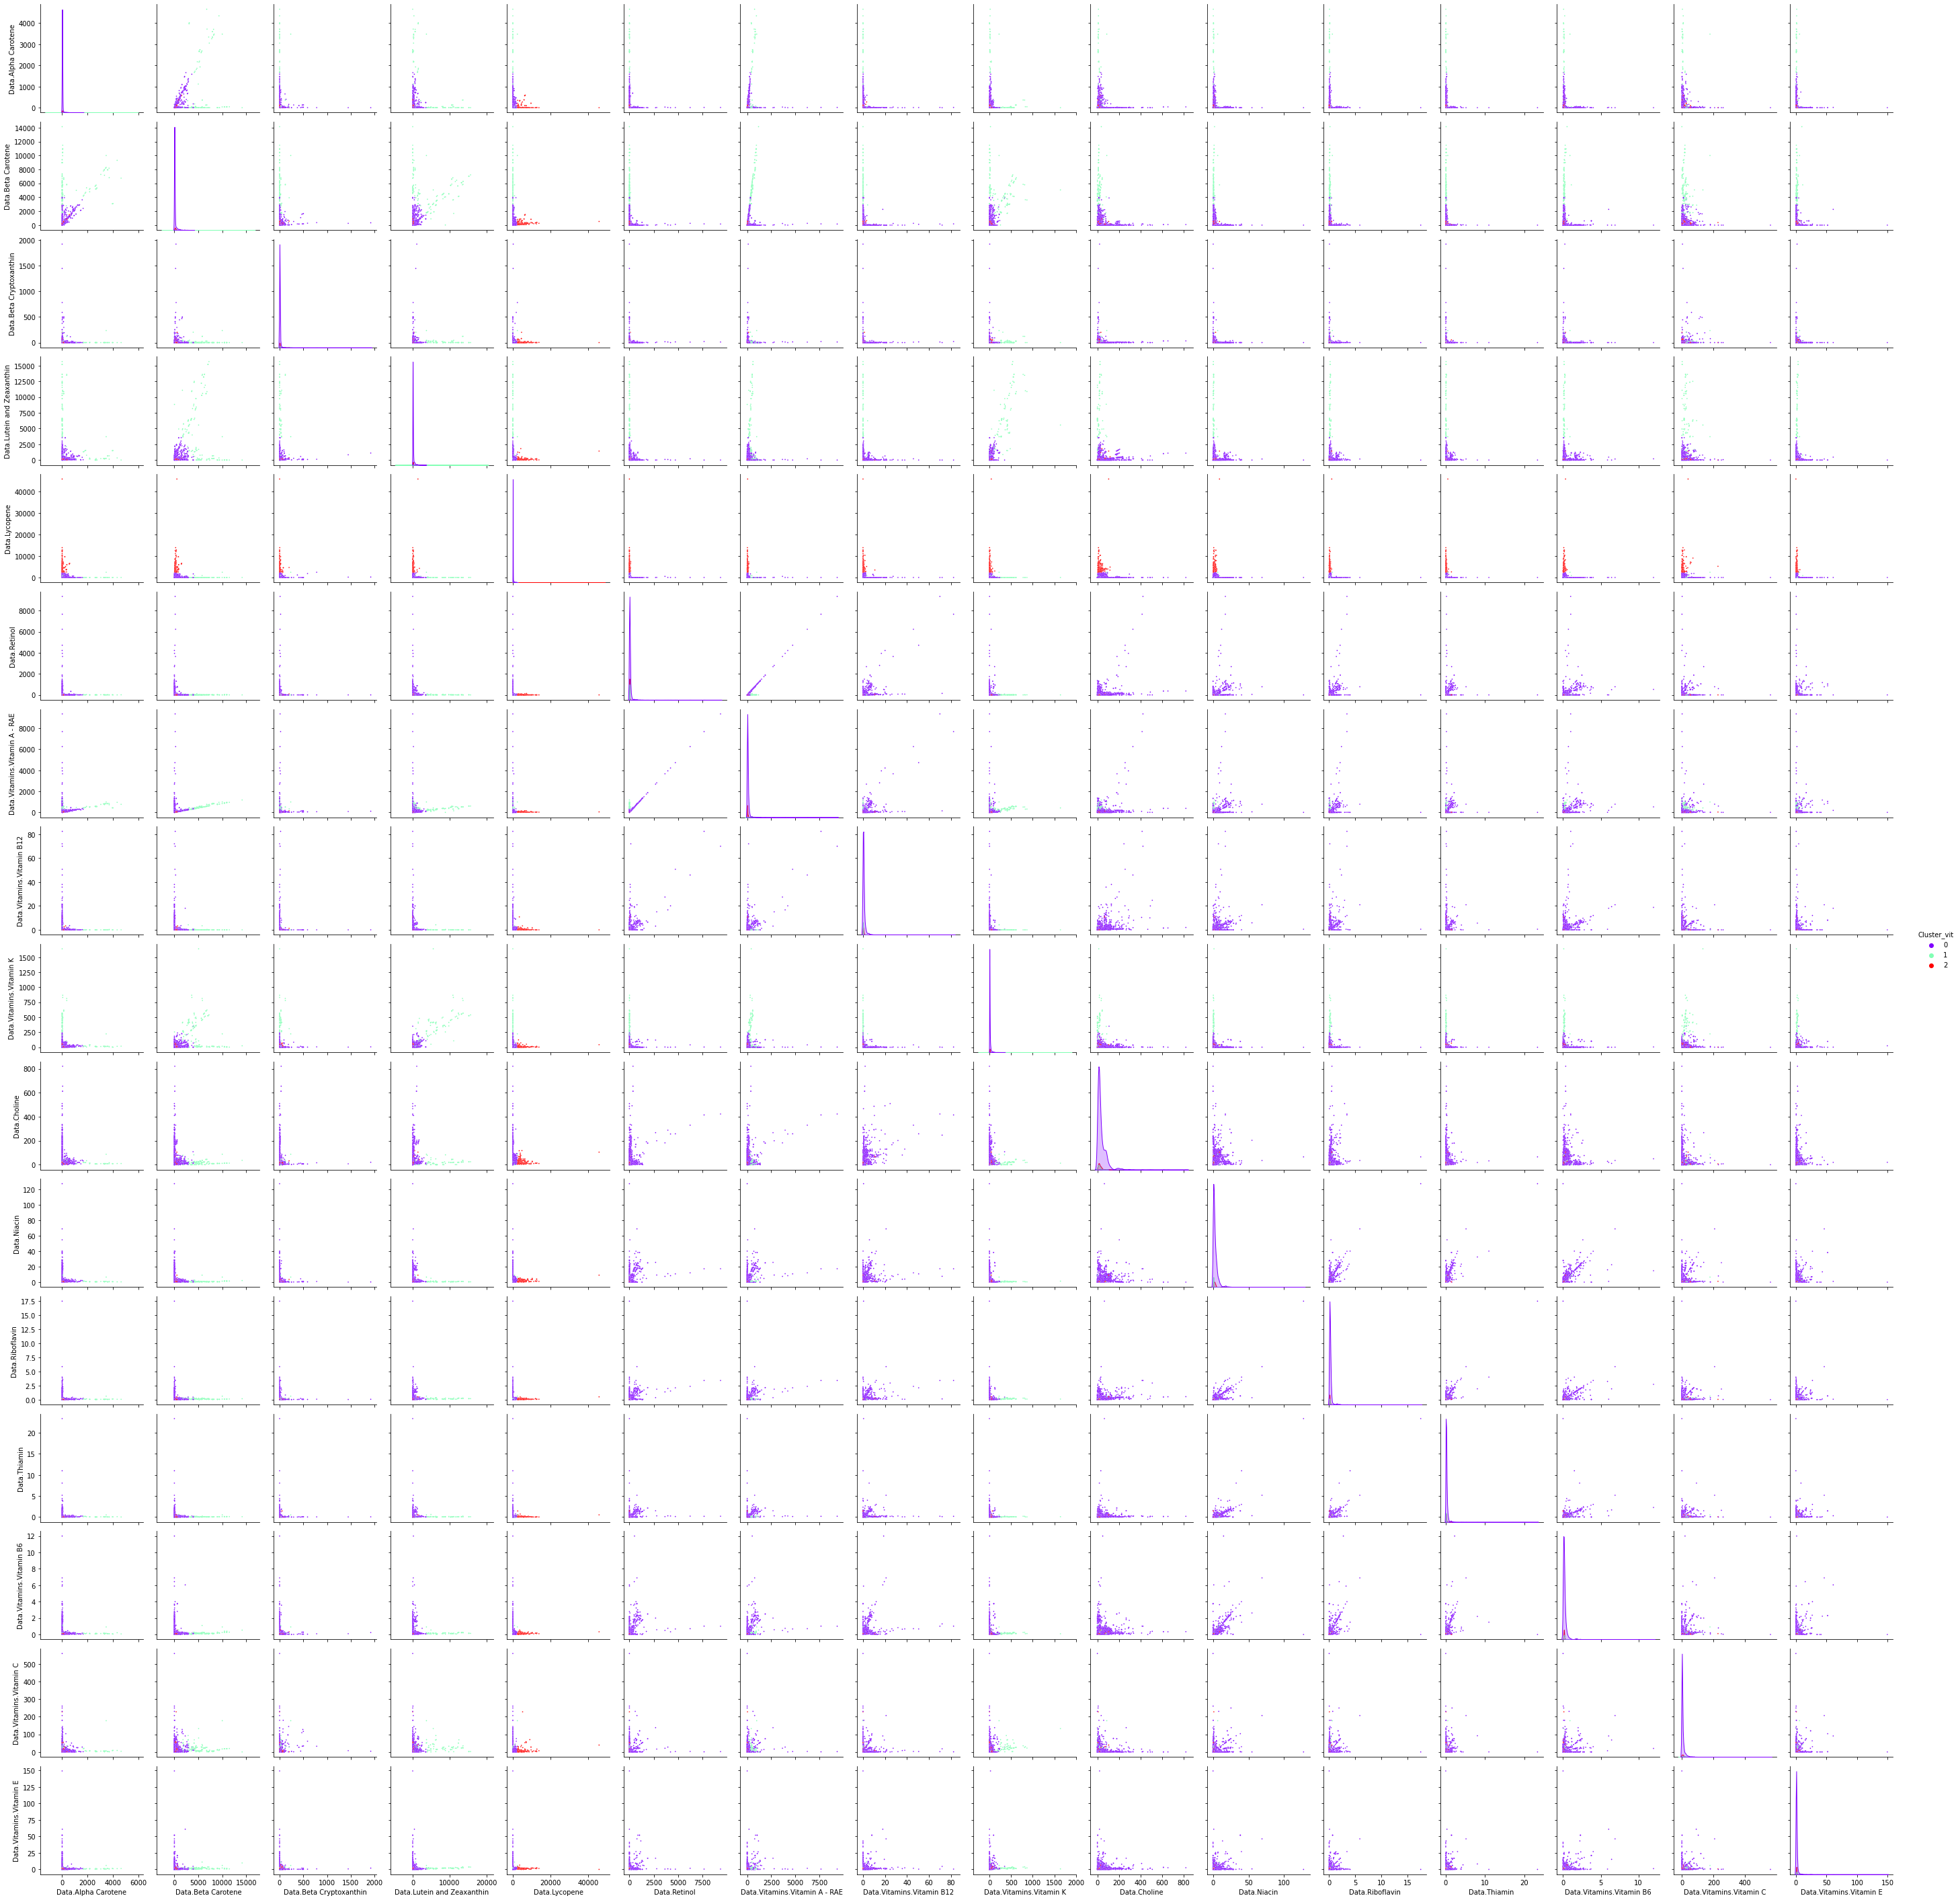

In [ ]:
vitamin = ['Data.Alpha Carotene',
'Data.Beta Carotene',
'Data.Beta Cryptoxanthin',
'Data.Lutein and Zeaxanthin',
'Data.Lycopene',
'Data.Retinol',
'Data.Vitamins.Vitamin A - RAE',
'Data.Vitamins.Vitamin B12',
'Data.Vitamins.Vitamin K',
'Data.Choline',
'Data.Niacin',
'Data.Riboflavin',
'Data.Thiamin',
'Data.Vitamins.Vitamin B6',
'Data.Vitamins.Vitamin C',
'Data.Vitamins.Vitamin E']

vitamML = food[vitamin]
foodclustersKM_vits = cluster.KMeans(n_clusters=Nclust).fit(vitamML)
food['Cluster_vit'] = foodclustersKM_vits.labels_
data = food[vitamin + ['Cluster_vit']]

sns.pairplot(data, hue='Cluster_vit', palette="rainbow", plot_kws={"s": 3})

In [ ]:
# Example: cluster 3 contains Licopene-containing foods (tomato)
food[food['Cluster_vit']==3]

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,...,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K,Cluster,Cluster_scaled,Cluster_vit


In [ ]:
# Example: cluster 0 contains beta-carotene-containing foods (orange-colored foods)
food[food['Cluster_vit']==0]

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,...,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K,Cluster,Cluster_scaled,Cluster_vit
0,Milk,"Milk, human",11000000,0,7,0,6.89,14,16.0,0.0,...,0.17,61,0.05,0.011,5.0,0.08,0.3,1,0,0
1,Milk,"Milk, NFS",11100000,0,4,0,4.87,8,17.9,0.0,...,0.42,59,0.56,0.060,0.1,0.03,0.2,1,0,0
2,Milk,"Milk, whole",11111000,0,7,0,4.67,12,17.8,0.0,...,0.41,32,0.54,0.061,0.0,0.05,0.3,1,0,0
3,Milk,"Milk, low sodium, whole",11111100,0,7,0,4.46,14,16.0,0.0,...,0.38,29,0.36,0.034,0.9,0.08,0.3,1,0,0
4,Milk,"Milk, calcium fortified, whole",11111150,0,7,0,4.67,12,17.8,0.0,...,0.41,32,0.54,0.061,0.0,0.05,0.3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7075,Green beans,"Green beans, cooked, as ingredient",99997545,68,375,0,7.26,0,15.9,2.8,...,0.25,35,0.00,0.132,10.8,0.43,44.8,1,0,0
7076,Summer squash,"Summer squash, cooked, as ingredient",99997550,0,117,0,4.11,0,9.8,1.2,...,0.36,10,0.00,0.141,18.6,0.15,4.4,1,0,0
7079,Other vegetables as ingredient in omelet,Other vegetables as ingredient in omelet,99997804,1,11,0,4.81,0,19.4,1.4,...,0.58,1,0.04,0.123,6.3,0.03,0.4,1,0,0
7080,Vegetables as ingredient in curry,Vegetables as ingredient in curry,99997810,368,994,0,11.60,0,14.6,2.2,...,0.28,98,0.00,0.177,16.2,0.24,8.9,1,0,0


In [ ]:
# test the original data with 4 clusters --> better separation?

Nclust = 4
from sklearn import cluster
foodclustersKM = cluster.KMeans(n_clusters=Nclust).fit(food_ML)

food['Cluster_n4'] = foodclustersKM.labels_

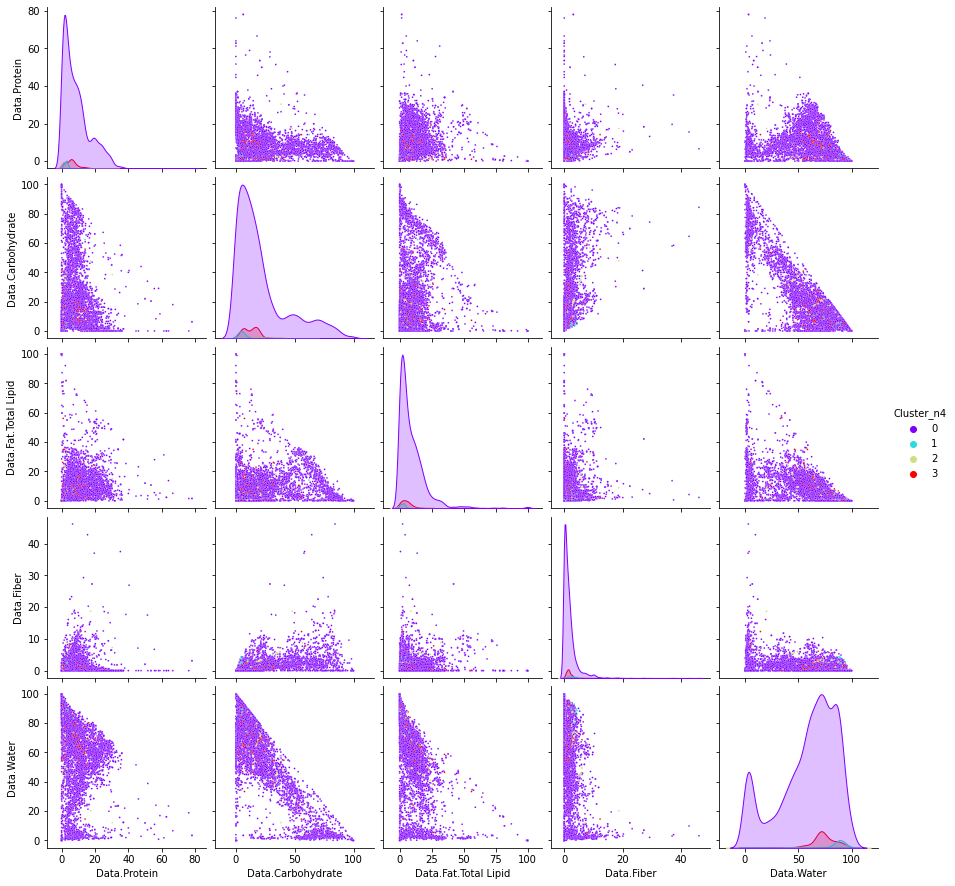

In [ ]:
data = food[['Data.Protein', 'Data.Carbohydrate', 'Data.Fat.Total Lipid', 'Data.Fiber', 'Data.Water','Cluster_n4']]
sns.pairplot(data, hue='Cluster_n4', palette="rainbow", plot_kws={"s": 3})

In [ ]:
food[food['Cluster_n4'] == 0 ]['Category'].value_counts().head(20)

Infant formula                     173
Rice                               143
Bread                              119
Potato                             105
Cookie                             100
Frankfurter or hot dog sandwich     95
Coffee                              91
Egg omelet or scrambled egg         82
Pie                                 77
Beef                                71
Cheese                              60
Chocolate milk                      51
Crackers                            51
Chicken                             44
Oatmeal                             44
Turkey                              43
Egg                                 41
Tea                                 41
Pretzels                            40
Pizza                               38
Name: Category, dtype: int64

In [ ]:
food[food['Cluster_n4'] == 1 ]['Category'].value_counts().head(20)

Spinach                         18
Collards                        14
Turnip greens                    8
Kale                             8
Greens                           7
Mustard greens                   4
Chard                            2
Cress                            2
Dandelion greens                 2
Watercress                       2
Spinach salad                    1
Parsley                          1
Mixed salad greens               1
Basil                            1
Sweet potato                     1
Turrnip greens                   1
Greens with ham or pork          1
Thistle leaves                   1
Channa Saag                      1
Spinach and cheese casserole     1
Name: Category, dtype: int64

In [ ]:
food[food['Cluster_n4'] == 2 ]['Category'].value_counts().head(20)

Carrots                                    27
Sweet potato                               25
Sweet potato fries                          8
Sweet potato tots                           6
Peas and carrots                            5
Sweet potatoes                              3
Beet greens                                 2
Lettuce                                     2
Pumpkin                                     2
Stuffed grape leaves with beef and rice     1
Carrots and beef                            1
Mixed vegetables                            1
Vegetable mixture                           1
Mixed vegetable juice                       1
Cilantro                                    1
Sweet potato chips                          1
Calabaza                                    1
Winter squash                               1
Sweet potato and pumpkin casserole          1
Stuffed grape leaves with lamb and rice     1
Name: Category, dtype: int64

In [ ]:
food[food['Cluster_n4'] == 3 ]['Category'].value_counts().head(20)

Pasta                                        24
Pasta with tomato-based sauce                16
Ravioli                                       8
Beef                                          6
Tomatoes                                      6
Chicken or turkey                             6
Tomato soup                                   5
Pork                                          4
Lasagna with meat                             4
Stuffed shells                                4
Pasta with tomato-based sauce and seafood     3
Pasta with tomato-based sauce and meat        3
Tortellini                                    3
Manicotti                                     3
Pasta with tomato-based sauce and poultry     3
Lasagna                                       3
Spaghetti sauce                               3
Salsa                                         3
Chili con carne with beans                    3
Ketchup                                       2
Name: Category, dtype: int64